<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 6

### Problem 0 (3 points)

## Group Members: Shivam Kaul, Gin Wang, Beck Addison

In [171]:
### IMPORTS ###
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Image Motion Basics 

### Problem 1.1 (Exam Style)

$$
\frac{1}{\sqrt{3^2+4^2}}
\begin{bmatrix} 
3,4
\end{bmatrix}
\begin{bmatrix}
1 \\
3 
\end{bmatrix} = 3
$$

### Problem 1.2 (Exam Style)

$$(1,1)^T \textbf{v} -5=0$$
$$(-1,1)^T \textbf{v}+1 = 0$$
$$(1,1)^T \textbf{v} =5$$
$$(-1,1)^T \textbf{v} = -1$$

Let $\textbf{v} = x,y$, 
$$x+y=5$$
$$-x+y=-1$$
$$\textbf{v} = (3,2)$$

## Part 2: Window Tracking 

In [132]:
g1 = np.array(
    [[6,2,4],
     [8,2,2],
     [2,4,4]])
g2 = np.array(
    [[9,3,6],
     [12,3,3],
     [3,6,6]])
gradient_g = np.array([g1,g2])

image_diff = np.array(
    [[0, 5, 0],
     [0, 0, 10],
     [15, 0, 0]])

### Problem 2.1 (Exam Style)

The formula for $A$ is given as:

$$A = \sum_{\mathbf{x}}\nabla g(\mathbf{x})\, [\nabla g(\mathbf{x})]^T w(\mathbf{x}-\mathbf{x}_f)$$

where
$$
\nabla g(\mathbf{x}) = \begin{bmatrix}\begin{bmatrix}
6 & 2 & 4\\
8 & 2 & 2\\
2 & 4 & 4
\end{bmatrix}
\\\begin{bmatrix}
9 & 3 & 6\\
12 & 3 & 3\\
3 & 6 & 6
\end{bmatrix}
\end{bmatrix}
$$


In [138]:
A = np.zeros((2,2))
for i in range(g1.shape[0]):
  for j in range(g1.shape[1]):
    x = np.array([g1[i,j],g2[i,j]])
    x = x.reshape((2,1))
    A = A + np.matmul(x,x.T)
A

array([[164., 246.],
       [246., 369.]])

So 
$$
A = \sum_{\mathbf{x}}\nabla g(\mathbf{x})\, [\nabla g(\mathbf{x})]^T w(\mathbf{x}-\mathbf{x}_f) = 
\begin{bmatrix}
164 & 246 \\
246 & 369
\end{bmatrix}
$$



Similarly,

$$
\mathbf{b} = \sum_{\mathbf{x}}\nabla g(\mathbf{x})\,  [f(\mathbf{x}) - g(\mathbf{x}) ]\, w(\mathbf{x}-\mathbf{x}_f)
$$

and


$$
[f(\mathbf{x}) - g(\mathbf{x})] = 
\begin{bmatrix} 
0 & 5 & 0  \\
0 & 0 & 10 \\
15 & 0 & 0 
\end{bmatrix}
$$

In [137]:
b = np.sum(
    gradient_g[:, 0:g1.shape[0], 0:g1.shape[1]] * 
    image_diff[0:g1.shape[0], 0:g1.shape[1]], 
    axis = (1,2)) \
    .reshape((2,1))
b

array([[60],
       [90]])

Hence

$$
b = 
\begin{bmatrix}
60 \\
90
\end{bmatrix}
$$

### Problem 2.2 (Exam Style)

The given feature $x_f$ does not suffer from the aperture problem because using the Lucas-Kanade tracker eliminates it owing to its assumption of constant motion in the immediate neighborhood. 

### Problem 2.3

In [157]:
np.round(
    np.linalg.pinv(A) @ b, 
    decimals = 2)

array([[0.11],
       [0.17]])

The approximate minimum-norm solution $x_0$ to the linear system is (to the nearest hundredth):

$$
\begin{bmatrix}
0.11 \\
0.17
\end{bmatrix}
$$

### Problem 2.4

The given equation is a linear equation and can be solved by taking the product of the pseudo-inverse of $A$ and $b$.
$$Ax = b$$

Let the Singular Value Decomposition of $A$ be given as the following:
$$ A = USV^T$$
Then,
$$A_{pseudo} = (USV^T)^{-1} = VS^{-1}U^T$$
<br>
Hence, the general solution for $x$ can be determined by:
$$x = A_{pseudo}*b = VS^{-1}U^Tb$$

## Part 3: The Lucas-Kanade Tracker

### Problem 3.1

In [170]:
def x_range(sigma):
    trunc_limit = np.ceil(3. * sigma)
    x_range = np.arange(2 * trunc_limit + 1) - trunc_limit
    return x_range

In [175]:
def averaging_kernel(sigma):
    
    def gauss_in_x(x, sigma):
        return np.exp(-x**2/(2*sigma**2))

    x = x_range(sigma)
    averaging_kernel = gauss_in_x(x, sigma)
    normalized_ave_kernel = 1/(np.linalg.norm(averaging_kernel))*averaging_kernel
    return normalized_ave_kernel, x
    

In [182]:
def differentiation_kernel(sigma):
    x = x_range(sigma)
    def differentiated_gaussian(x, sigma):
        # literally just the derivative of the gaussian function (I hope that's what it's looking for!)
        return (-x/sigma**2)*np.exp(-x**2/(2*sigma**2))
        
    differentiation_kernel = differentiated_gaussian(x, sigma)
    normalized_diff_kernel = 1/(np.linalg.norm(differentiation_kernel))*differentiation_kernel
    return normalized_diff_kernel, x

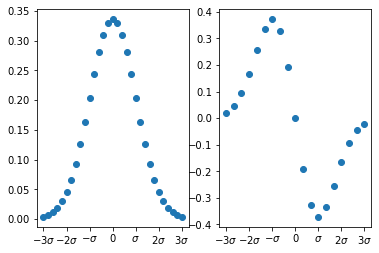

In [194]:
## PLOTS ##
sigma_list = ['$-3\sigma$', '$-2\sigma$', '$-\sigma$', '0', '$\sigma$', '$2\sigma$', '$3\sigma$']
ticks = np.linspace(-3, 3, 7)

sigma_ave = 5
plt.subplot(1, 2, 1)
kernel, x = averaging_kernel(sigma_ave)
plt.xticks(sigma_ave*ticks, sigma_list)
plt.scatter(x, kernel)

sigma_diff = 3
plt.subplot(1,2,2)
kernel, x = differentiation_kernel(sigma_diff)
plt.xticks(sigma_diff*ticks, sigma_list)
plt.scatter(x, kernel)


### Problem 3.2

Note: I was unable to reach the solution to this problem - I couldn't understand the pseudocode and I was confused by the actions of the kernels, gradients, given parameters and loss function in this problem. 

In [211]:
import urllib.request
import pickle
from os import path as osp

pickle_file_name = 'inputs.pkl'
if not osp.exists(pickle_file_name):
    fmt = 'https://www2.cs.duke.edu/courses/spring21/compsci527/homework/6/{}'
    url = fmt.format(pickle_file_name)
    urllib.request.urlretrieve(url, pickle_file_name)
with open(pickle_file_name, 'rb') as file:
    inputs = pickle.load(file)
f, g = inputs['f'], inputs['g']

In [212]:
params = {
    "window" : 1.5,
    "differentiation" : 1,
    "termination_delta" : 10**(-3),
    "termination_epsilon" : 10**(-6),
    "termination_rho" : 10,
    "max_iterations" : 30
}


In [221]:
def lk_iterator(f, g, params):      

        params['X'] = params['X'] + params['shift_g'] 
        params['j'] = g[params['X']]

        gradient_kernel, gradient_x = differentiation_kernel(params['differentiation'])
        A = gradient_x.T * (gradient_x * np.array([params['w'], params['w']]))
        b = gradient_x.T * ((params['i'] - params['j']) * params['w'])
        s = np.linalg.lstsq(A, b)
        displacement_old = params['displacement']
        params['displacement'] = params['displacement'] + s
        
        def L(d):
            return np.sum((g[params['X'] + d] - f[params['X']])**2*params['w'])

        if (np.linalg.norm(s) <= params['termination_delta']) or \
           (L(displacement_old) - L(params['displacement']) <= params['displacement_epsilon']):
           done = True

        if (np.linalg.norm(params['displacement']- displacement_old) > params['termination_rho'] or params['iteration'] > params['max_iterations']):
            lost = True

        return done, lost, params

In [256]:
def lucas_kanade(f, g, params):

    
    # construct support of W, which is just [0, ..., 100] = omega where w(omega) > 0
    half_width = 5          # Piazza @223  
    Omega = np.linspace(0, 100, 101, dtype = int) 
    X_support_of_w = Omega[np.where(np.absolute(Omega) <= half_width)]
    # use W indicator to build vector of nonzero values of w(x)
    ave_kernel, w_x = averaging_kernel(params['window'])
    
    # window coords in f added to space
    window_f = np.linspace(0, 10, 11, dtype = int) # the window is centered at position 2 with indices [0,1,2,3,4]
    X_support = X_support_of_w + window_f   # add these coordinates to the set X
    f_space = f[X_support]                  # find all coordinates of X in f

    # initialize variables for iteration in the lucas kanade iterator

    initialization_variables = {
        'displacement' : np.zeros(f.shape),
        'shift_g' : np.zeros(f.shape),
        'X' : X_support,
        'w' : w_x,
        'i' : f_space,
        'j' : None,
        'iteration' : 0
    }

    # add these parameters to the parameters passed to lk iterator
    params.update(initialization_variables)

    done, lost = False, False

    while (not (done or lost)): 
        params['iteration'] += 1
        done, lost, params = lk_iterator(f, g, params)
    
    if lost:                        # no need to consider L_max (Piazza @236)
        return None
    else:
        return displacement


In [257]:
lucas_kanade(f, g, params)

ValueError: operands could not be broadcast together with shapes (6,) (11,) 